# Plots to compare predictions of LC with NN

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import mean_squared_error

In [2]:
# Load prediction results from LC model and NN model
df_LC = pd.read_excel('predictions_LC_DAVdata.xlsx')
df_NN = pd.read_excel('predictions_NN_DAVdata.xlsx')

In [3]:
genders = ['Male', 'Female']
genders_mapping = [1, 0]
countries = ['USA', 'POL', 'DNK']
countries_mapping = [8, 7, 2]


In [4]:
df_LC

,Country,Year,Gender,Age,log_mortality,mortality,predic_lnm
0,DNK,2006,Female,0,-5.659574,0.003484,-4.927397
1,DNK,2006,Female,1,-8.979229,0.000126,-7.355439
2,DNK,2006,Female,2,-8.987197,0.000125,-7.972652
3,DNK,2006,Female,3,-8.746606,0.000159,-8.203944
4,DNK,2006,Female,4,-9.672376,0.000063,-8.349494
...,...,...,...,...,...,...,...
6661,USA,2016,Male,96,-1.181204,0.306909,-1.057830
6662,USA,2016,Male,97,-1.139750,0.319899,-1.000354
6663,USA,2016,Male,98,-1.004789,0.366122,-0.957529
6664,USA,2016,Male,99,-0.946588,0.388063,-0.912884


In [5]:
df_NN

,Country,Year,Gender,Age,log_mortality,mortality,prediction
0,0,2006,0,0,-5.525218,0.003985,-5.615105
1,0,2006,0,1,-7.995428,0.000337,-8.189780
2,0,2006,0,2,-9.372859,0.000085,-8.808136
3,0,2006,0,3,-8.866751,0.000141,-9.112994
4,0,2006,0,4,-9.097012,0.000112,-9.107761
...,...,...,...,...,...,...,...
19589,8,2016,1,96,-1.181204,0.306909,-1.093910
19590,8,2016,1,97,-1.139750,0.319899,-0.956999
19591,8,2016,1,98,-1.004789,0.366122,-0.882325
19592,8,2016,1,99,-0.946588,0.388063,-0.721605


In [6]:
years = df_LC['Year'].drop_duplicates()

mse_df = pd.DataFrame(columns=['Country', 'Year', 'MSE_NN', 'MSE_LC'])
index = 0

for i, country in enumerate(countries):
    for year in years:
        subset_LC = df_LC[(df_LC['Country'] == country) & (df_LC['Year'] == year)]
        subset_NN = df_NN[(df_NN['Country'] == countries_mapping[i]) & (df_NN['Year'] == year )]
        
        if not subset_LC.empty:
            mse_lc = mean_squared_error(subset_LC['log_mortality'], subset_LC['predic_lnm'])
            mse_nn = mean_squared_error(subset_NN['log_mortality'], subset_NN['prediction'])
        
            mse_df.loc[index] = [country, year, mse_nn, mse_lc]
            index += 1

        
    
mse_df

,Country,Year,MSE_NN,MSE_LC
0,USA,2006,0.006163,0.117761
1,USA,2007,0.006655,0.127782
2,USA,2008,0.005146,0.146537
3,USA,2009,0.007903,0.163244
4,USA,2010,0.008003,0.190517
5,USA,2011,0.009820,0.188724
6,USA,2012,0.012617,0.200810
7,USA,2013,0.016278,0.201980
8,USA,2014,0.018787,0.207536
9,USA,2015,0.025132,0.191817


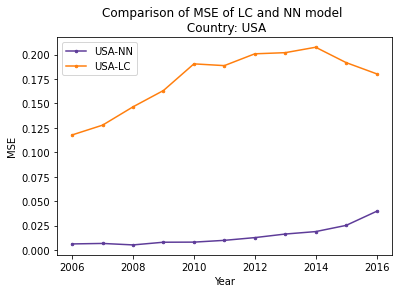

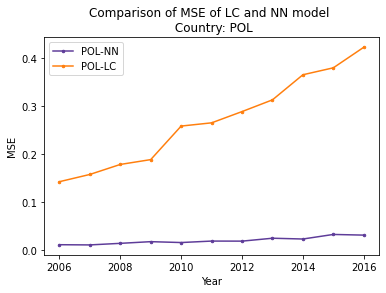

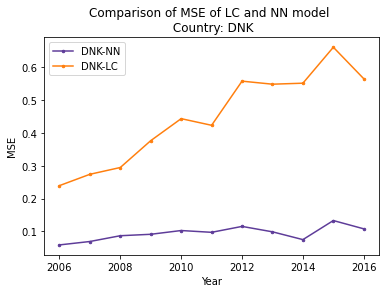

In [7]:

colors_NN = ['#d4b9da', '#9e77b0', '#5e3c99']
colors_LC = ['#b3cde3', '#6497b1', '#005b96']

for i, country in enumerate(countries):
    subset = mse_df[mse_df['Country'] == country]
    
    plt.figure(i)
    plt.plot(subset['Year'], subset['MSE_NN'], label=f'{country}-NN', marker='.', markersize=5, color='#5e3c99')
    plt.plot(subset['Year'], subset['MSE_LC'], label=f'{country}-LC', marker='.', markersize=5, color='#ff7f0e')
    plt.xlabel('Year')
    plt.ylabel('MSE')
    plt.title(f'Comparison of MSE of LC and NN model \n Country: {country}')
    plt.legend()


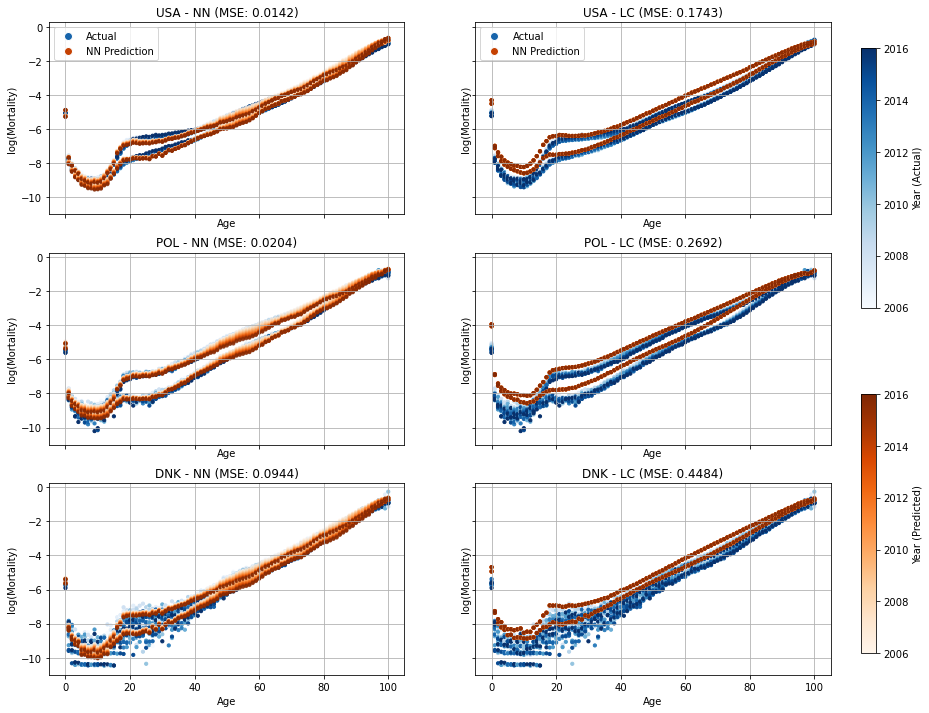

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.cm as cm

from matplotlib.lines import Line2D

# Define countries
num_countries = len(countries)

# Create 3x2 grid (each row: country, left: NN, right: LC)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12), sharex=True, sharey=True)

# Define colormaps
cmap_actual = sns.color_palette("Blues", as_cmap=True)
cmap_pred = sns.color_palette("Oranges", as_cmap=True)

# Normalize across all years for consistent coloring
all_years = pd.concat([df_NN['Year'], df_LC['Year']])
norm = plt.Normalize(all_years.min(), all_years.max())

custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='Actual',
           markerfacecolor=cmap_actual(0.8), markersize=8),
    Line2D([0], [0], marker='o', color='w', label='NN Prediction',
           markerfacecolor=cmap_pred(0.8), markersize=8),
]

for i, country in enumerate(countries):
    subset_NN = df_NN[df_NN['Country'] == countries_mapping[i]]
    subset_LC = df_LC[df_LC['Country'] == country]

    # Ensure sorting for alignment (optional)
    subset_NN = subset_NN.sort_values(by=['Age', 'Year'])
    subset_LC = subset_LC.sort_values(by=['Age', 'Year'])

    # NN plot (left)
    ax_nn = axes[i, 0]
    mse_nn = mean_squared_error(subset_NN['log_mortality'], subset_NN['prediction'])

    ax_nn.scatter(
        subset_NN['Age'],
        subset_NN['log_mortality'],
        c=[cmap_actual(norm(y)) for y in subset_NN['Year']],
        s=10,
        label='Actual'
    )
    ax_nn.scatter(
        subset_NN['Age'],
        subset_NN['prediction'],
        c=[cmap_pred(norm(y)) for y in subset_NN['Year']],
        s=10,
        alpha=0.6,
        label='NN Prediction'
    )
    ax_nn.set_title(f"{country} - NN (MSE: {mse_nn:.4f})")
    ax_nn.set_xlabel("Age")
    ax_nn.set_ylabel("log(Mortality)")
    ax_nn.grid(True)
    if i == 0:
        ax_nn.legend(handles=custom_legend)

    # LC plot (right)
    ax_lc = axes[i, 1]
    mse_lc = mean_squared_error(subset_LC['log_mortality'], subset_LC['predic_lnm'])

    ax_lc.scatter(
        subset_LC['Age'],
        subset_LC['log_mortality'],
        c=[cmap_actual(norm(y)) for y in subset_LC['Year']],
        s=10,
        label='Actual'
    )
    ax_lc.scatter(
        subset_LC['Age'],
        subset_LC['predic_lnm'],
        c=[cmap_pred(norm(y)) for y in subset_LC['Year']],
        s=10,
        alpha=0.6,
        label='LC Prediction'
    )
    ax_lc.set_title(f"{country} - LC (MSE: {mse_lc:.4f})")
    ax_lc.set_xlabel("Age")
    ax_lc.set_ylabel("log(Mortality)")
    ax_lc.grid(True)
    if i == 0:
        ax_lc.legend(handles=custom_legend)

# Colorbars for year gradients
cbar_ax_actual = fig.add_axes([0.93, 0.55, 0.015, 0.3])  # Blue colorbar for actual
sm_actual = cm.ScalarMappable(cmap=cmap_actual, norm=norm)
sm_actual.set_array([])
fig.colorbar(sm_actual, cax=cbar_ax_actual, label="Year (Actual)")

cbar_ax_pred = fig.add_axes([0.93, 0.15, 0.015, 0.3])  # Orange colorbar for predicted
sm_pred = cm.ScalarMappable(cmap=cmap_pred, norm=norm)
sm_pred.set_array([])
fig.colorbar(sm_pred, cax=cbar_ax_pred, label="Year (Predicted)")


plt.show()
